In [1]:
# import library
import pandas as pd
import numpy as np
import re
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

In [2]:
# import dataset
def load_data():
    data = pd.read_excel('datalabelchatgpt_skripsi.xlsx')
    data = data.loc[:, ::-1]
    return data

data = load_data()
data.head()

,label,tweet
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn..."
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus..."
4,Positif,"""#TripGen dapat memberikan layanan loop tertut..."


In [3]:
# hapus data kosong
data.dropna(inplace=True)
# mendeteksi keberadaan nilai kosong
data.isna().values.any()

False

In [4]:
# hapus duplikasi data
data.drop_duplicates(inplace=True)
# hitung jumlah duplikasi data
data.duplicated().value_counts()

False    7101
dtype: int64

In [5]:
data.shape

(7101, 2)

In [6]:
data['label'].value_counts()

Netral     3932
Negatif    1853
Positif    1316
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset labels distribution')

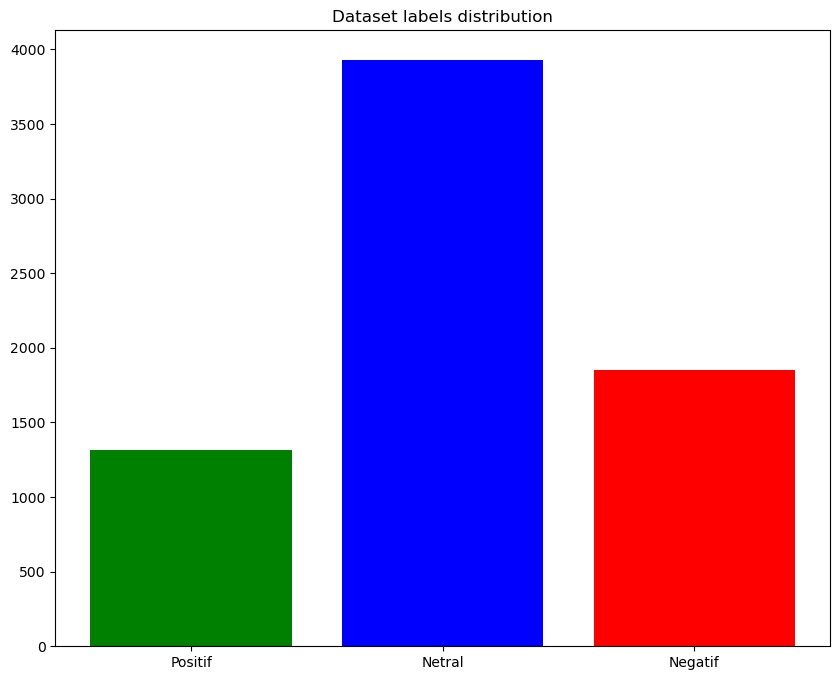

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

label_cnt = Counter(data.label)
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values(), color = ["green", "blue", "red"])
plt.title("Dataset labels distribution")

# PREPROCESSING

In [8]:
%%time
#Mengubah text menjadi lowercase
data['lower'] = data['tweet'].str.lower()
data.head()

Wall time: 15.6 ms


,label,tweet,lower
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn..."
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus..."
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut..."


In [9]:
%%time
import re # impor modul regular expression
def hapus_angka(text):
    text = re.sub(r"\d+", "", text)
    return text

data['hapusangka']=data['lower'].apply(hapus_angka)
data.head()

Wall time: 62.5 ms


,label,tweet,lower,hapusangka
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn..."
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus..."
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut..."


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!pip install Sastrawi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#import stopword
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

#import sastrawi
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import word_tokenize

In [12]:
%%time
key_norm = pd.read_csv('key_norm.csv')

# Membuat Fungsi Normalisasi Teks
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
  if (key_norm['singkat'] == word).any()
  else word for word in text.split()
  ])

  text = str.lower(text)
  return text

data['normalisasi'] = data['hapusangka'].apply(text_normalize)
data.head()

Wall time: 5min 39s


,label,tweet,lower,hapusangka,normalisasi
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn..."
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus..."
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut..."


In [13]:
%%time
# all
emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',
                       '😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',
                       '😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',
                       '😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',
                       '☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',
                       '😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',
                       '🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',
                       '👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','👍🏻','🤝',
                       '👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',
                       '💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',
                       '🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',
                       '👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',
                       '💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',
                       '🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',
                       '🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',
                       '📉','🗒','🗓','⭐'])
# sad happy
emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',
                     ': NS)','8)',':HAI','@',':HAI)',':‑)',
                     ':P',':@','8‑D',':‑)',':-&','=D',':‑p',
                     '=‑D','XD',':D',':-))','%-)',':}',
                     ':c)',':^)',':C','>:3',':>','L',':-/','>:/',
                     ':S','>:[','@',':-(','"["',':-<',
                     '=\\','=/','>:(',':',':{','>:\\',
                     '(',':','(", ")',':','("',':-c',
                     '> :(',':‑',':NS('])
# all emot happy + sad
emoticons = emoticons_phone.union(emoticons_sad_happy)

def Scan(text):
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    # remove coma
    text = re.sub(r',','',text)
    # remove angka
    text = re.sub('[0-9]+', '', text)
    # hapus teks tidak relevan
    text = re.sub('[^a-zA-Z]','  ', text)
    # tokenize
    text = word_tokenize(text)
    # lemmatization
    text = [lemma.lemmatize(word=w,pos='v') for w in text]
    return text

    text_clean = []
    for word in text:
        if (word not in emoticons or # remove emoticons
            word not in string.punctuation): # remove punctuation
            text_clean.append(word)
    return text_clean

data['token'] = data['normalisasi'].apply(Scan)
data.head()

Wall time: 6.85 s


,label,tweet,lower,hapusangka,normalisasi,token
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,"[halaman, obrolan, chatgpt, openai, tidak, ter..."
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,"[snapchat, merilis, chatbot, ai, nya, sendiri,..."
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...","[chatgpt, untuk, guru, panduan, oleh, evan, du..."
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","[chatgpt, risiko, dan, perlunya, kebijakan, pe..."
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","[tripgen, dapat, memberikan, layanan, loop, te..."


In [14]:
%%time
#remove stopword
def removestopword(text):
  cleanwords = []
  for word in text:
    if word not in stop_words:
      cleanwords.append(word)
  return " ".join(cleanwords)

data['filter'] = data['token'].apply(removestopword)
data.head()

Wall time: 9.85 s


,label,tweet,lower,hapusangka,normalisasi,token,filter
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,"[halaman, obrolan, chatgpt, openai, tidak, ter...",halaman obrolan chatgpt openai tercetak firefo...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,"[snapchat, merilis, chatbot, ai, nya, sendiri,...",snapchat merilis chatbot ai nya didukung chatg...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...","[chatgpt, untuk, guru, panduan, oleh, evan, du...",chatgpt guru panduan evan dunne grup akar rump...
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","[chatgpt, risiko, dan, perlunya, kebijakan, pe...",chatgpt risiko kebijakan perusahaan orlylobel
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","[tripgen, dapat, memberikan, layanan, loop, te...",tripgen layanan loop tertutup wisatawan perjal...


In [15]:
%%time
# Merubah Kata menjadi Kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat Fungsi untuk Stemming bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    text = text = " ".join([stemmer.stem(word) for word in text.split()])
    return text

data['fulltext'] = data['filter'].apply(stemming)
data.head()

Wall time: 42min 9s


,label,tweet,lower,hapusangka,normalisasi,token,filter,fulltext
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,"[halaman, obrolan, chatgpt, openai, tidak, ter...",halaman obrolan chatgpt openai tercetak firefo...,halaman obrol chatgpt openai cetak firefox sty...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,"[snapchat, merilis, chatbot, ai, nya, sendiri,...",snapchat merilis chatbot ai nya didukung chatg...,snapchat rilis chatbot ai nya dukung chatgpt i...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...","[chatgpt, untuk, guru, panduan, oleh, evan, du...",chatgpt guru panduan evan dunne grup akar rump...,chatgpt guru pandu evan dunne grup akar rumput...
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","[chatgpt, risiko, dan, perlunya, kebijakan, pe...",chatgpt risiko kebijakan perusahaan orlylobel,chatgpt risiko bijak usaha orlylobel
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","[tripgen, dapat, memberikan, layanan, loop, te...",tripgen layanan loop tertutup wisatawan perjal...,tripgen layan loop tutup wisatawan jalan pepat...


In [16]:
data.to_excel('datacleanchatgpt_skripsi.xlsx',encoding='utf8', index=True)